# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [85]:
# Import essential libraries for data manipulation and analysis
# Data manipulation
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns


#Date and time manipulation
from datetime import datetime


# Machine Learning - preprocessing and model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [49]:
# Importing the file porter_data_1.csv
df = pd.read_csv(r'C:\Users\Shagufa Nausheen\Downloads\notebook\starter-files-porter\Delivery_Starter\porter_data_1.csv')

In [51]:
# Summarize dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [53]:
# Check loaded data
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [55]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

In [57]:
df[['created_at', 'actual_delivery_time']].dtypes

created_at              datetime64[ns]
actual_delivery_time    datetime64[ns]
dtype: object

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [59]:
# Convert categorical features to category type

categorical_columns = ['market_id', 'store_primary_category', 'order_protocol']
df[categorical_columns] = df[categorical_columns].astype('category')
df[categorical_columns].dtypes

market_id                 category
store_primary_category    category
order_protocol            category
dtype: object

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [61]:
# Calculate time taken in minutes
df['delivery_time_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60


In [63]:
# Display data for created_at, actual_delivery_time,delivery_time_minutes
df[['created_at', 'actual_delivery_time', 'delivery_time_minutes']].head()

created_at actual_delivery_time  delivery_time_minutes
0 2015-02-06 22:24:17  2015-02-06 23:11:17                   47.0
1 2015-02-10 21:49:25  2015-02-10 22:33:25                   44.0
2 2015-02-16 00:11:35  2015-02-16 01:06:35                   55.0
3 2015-02-12 03:36:46  2015-02-12 04:35:46                   59.0
4 2015-01-27 02:12:36  2015-01-27 02:58:36                   46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [65]:
# Extract the hour and day of week from the 'created_at' timestamp
df['hour'] = df['created_at'].dt.hour
df['day_of_week'] = df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)


In [67]:
# Display data for hour, day_of_week, isWeekend
df[['created_at','hour', 'day_of_week', 'isWeekend']].head()

created_at  hour  day_of_week  isWeekend
0 2015-02-06 22:24:17    22            4          0
1 2015-02-10 21:49:25    21            1          0
2 2015-02-16 00:11:35     0            0          0
3 2015-02-12 03:36:46     3            3          0
4 2015-01-27 02:12:36     2            1          0

In [69]:
# Drop unnecessary columns
df.drop(['created_at', 'actual_delivery_time'], axis=1, inplace=True)


In [71]:

df.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
0       1.0                      4            1.0            4      3441   
1       2.0                     46            2.0            1      1900   
2       2.0                     36            3.0            4      4771   
3       1.0                     38            1.0            1      1525   
4       1.0                     38            1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  \
0                14.0                      21.0     34.44   
1                 2.0                       2.0     27.60   
2                 6.0                      18.0     11.56   
3                 6.0                       8.0     31.80   
4                 5.0                       7.0      8.20   

   delivery_time_minutes  hour  day_of_week  isWeekend  
0                   47.0    22            4          0  
1                   44.0    21            1          0  
2                   55.0     0            0          0  
3                   59.0     3            3          0  
4                   46.0     2            1          0

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [75]:
# Define target variable (y) and features (X)

# Target variable
y = df['delivery_time_minutes']

# Input Features
X = df.drop(columns=['delivery_time_minutes'])

In [81]:
# Check summary
y.info()
X.info()

<class 'pandas.core.series.Series'>
RangeIndex: 175777 entries, 0 to 175776
Series name: delivery_time_minutes
Non-Null Count   Dtype  
--------------   -----  
175777 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 175777 non-null  category
 1   store_primary_category    175777 non-null  category
 2   order_protocol            175777 non-null  category
 3   total_items               175777 non-null  int64   
 4   subtotal                  175777 non-null  int64   
 5   num_distinct_items        175777 non-null  int64   
 6   min_item_price            175777 non-null  int64   
 7   max_item_price            175777 non-null  int64   
 8   total_onshift_dashers     175777 non-null  float64 
 9   total_busy_dashers        17577

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [87]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [89]:
# Summary
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 102712 to 121958
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 140621 non-null  category
 1   store_primary_category    140621 non-null  category
 2   order_protocol            140621 non-null  category
 3   total_items               140621 non-null  int64   
 4   subtotal                  140621 non-null  int64   
 5   num_distinct_items        140621 non-null  int64   
 6   min_item_price            140621 non-null  int64   
 7   max_item_price            140621 non-null  int64   
 8   total_onshift_dashers     140621 non-null  float64 
 9   total_busy_dashers        140621 non-null  float64 
 10  total_outstanding_orders  140621 non-null  float64 
 11  distance                  140621 non-null  float64 
 12  hour                      140621 non-null  int32   
 13  day_of_week               140

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [91]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols =X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['category']).columns.tolist()

print("Numerical Columns:",numerical_cols)
print("Categorical Columns:",categorical_cols)


Numerical Columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'isWeekend']
Categorical Columns: ['market_id', 'store_primary_category', 'order_protocol']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

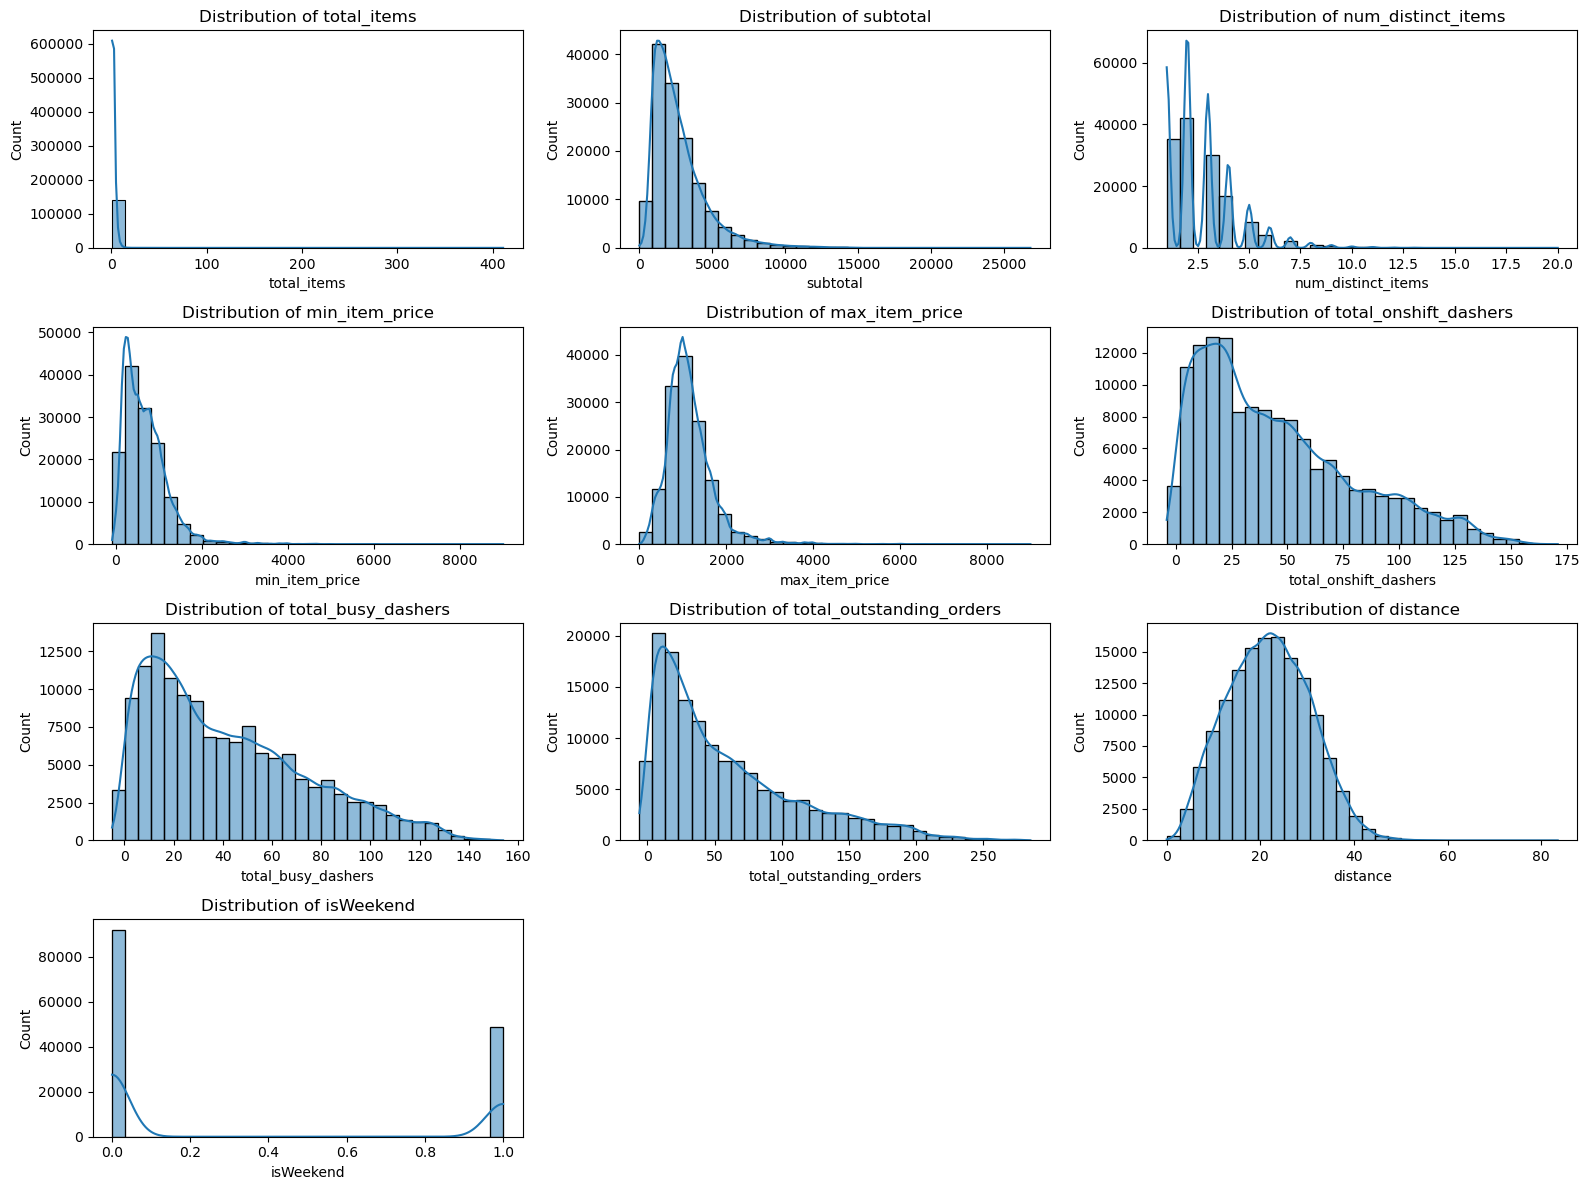

In [93]:
# Plot distributions for all numerical columns
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) + 2) // 3, 3, i)
    sns.histplot(X_train[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

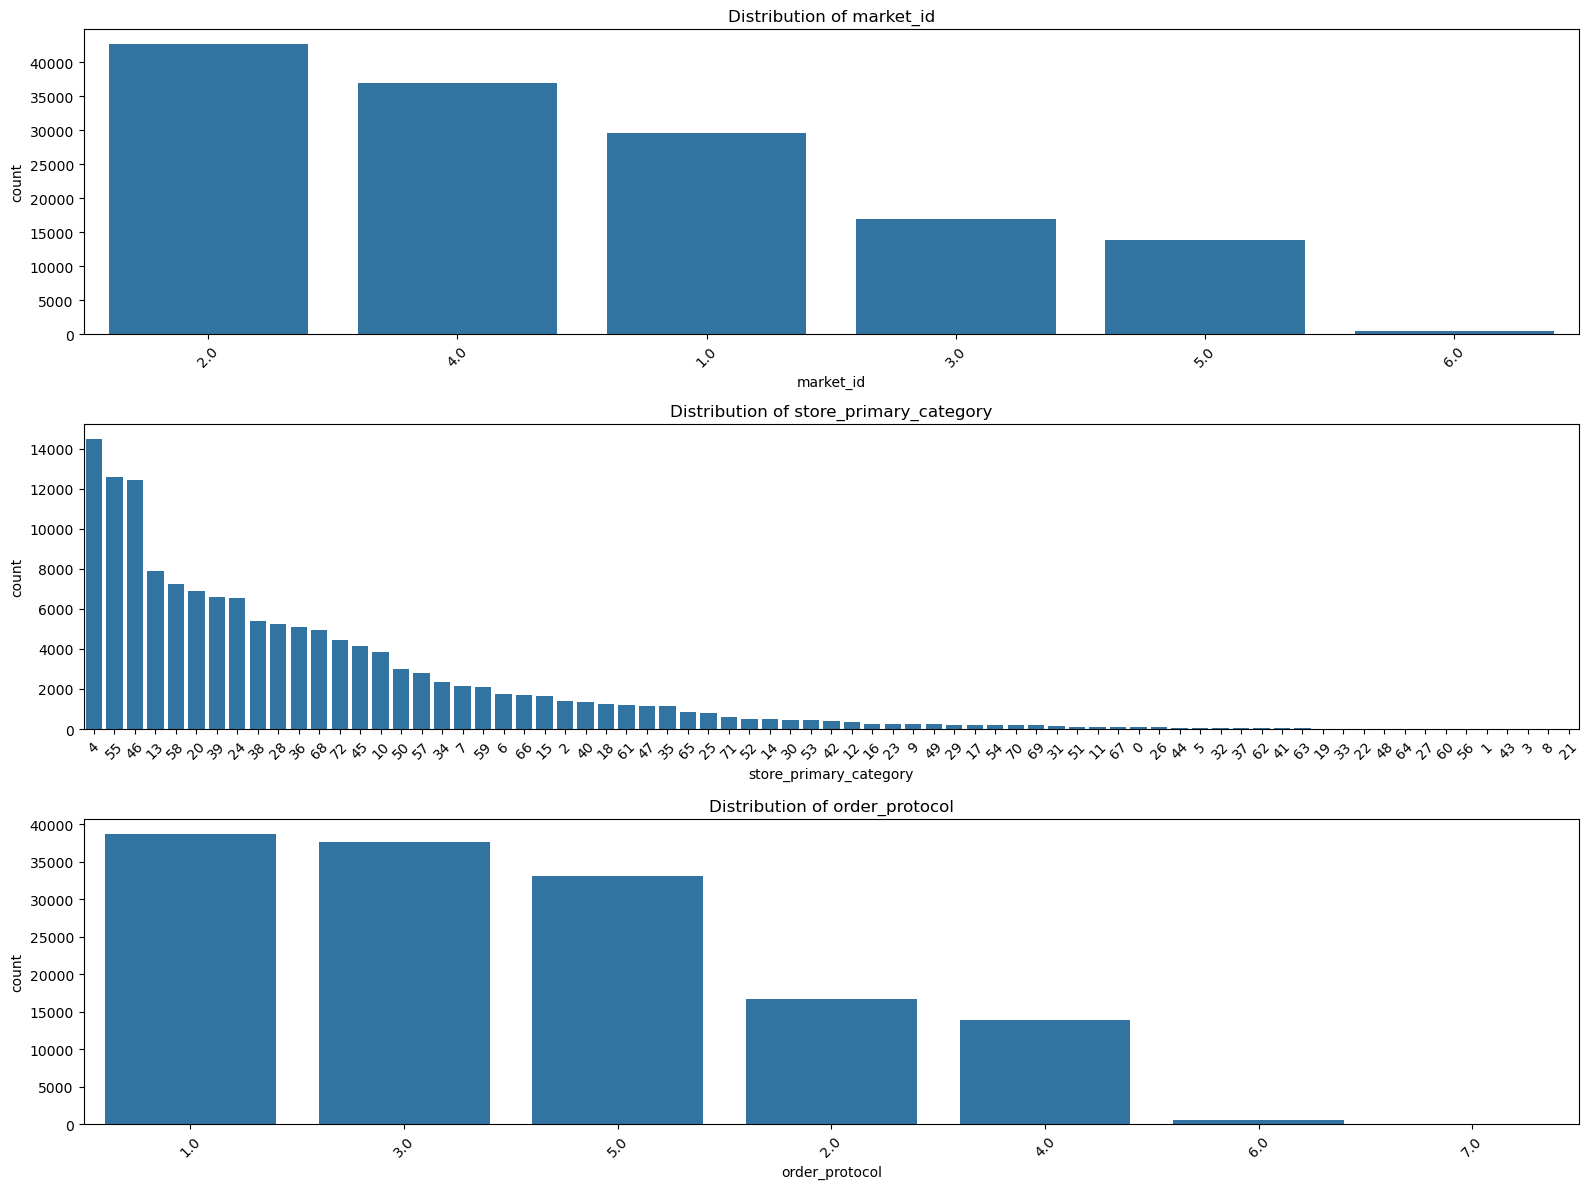

In [95]:
# Distribution of categorical columns
cat_cols = X_train.select_dtypes(include='category').columns

# Set up the plot grid
plt.figure(figsize=(16, 4 * len(cat_cols)))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 1, i)
    sns.countplot(data=X_train, x=col, order=X_train[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

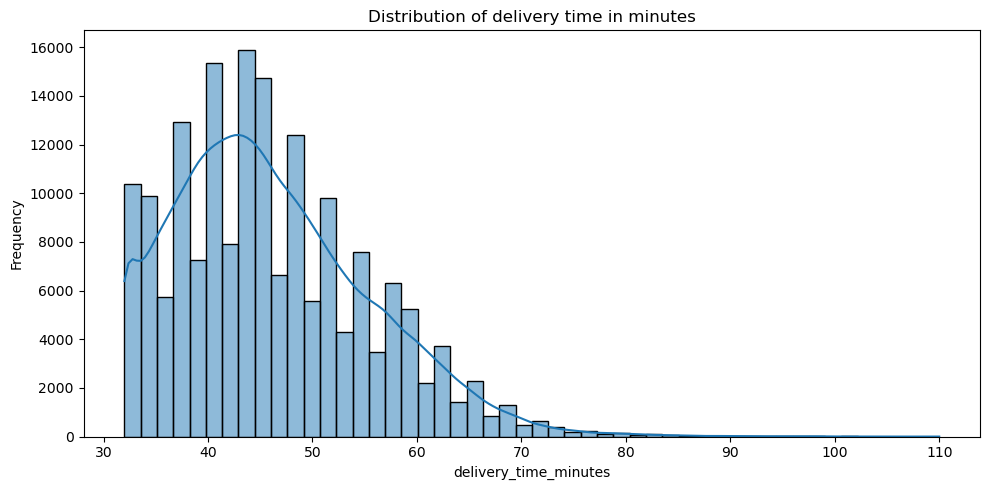

In [97]:
# Distribution of time_taken
plt.figure(figsize=(10, 5))
sns.histplot(df['delivery_time_minutes'], bins=50, kde=True)
plt.title('Distribution of delivery time in minutes')
plt.xlabel('delivery_time_minutes')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

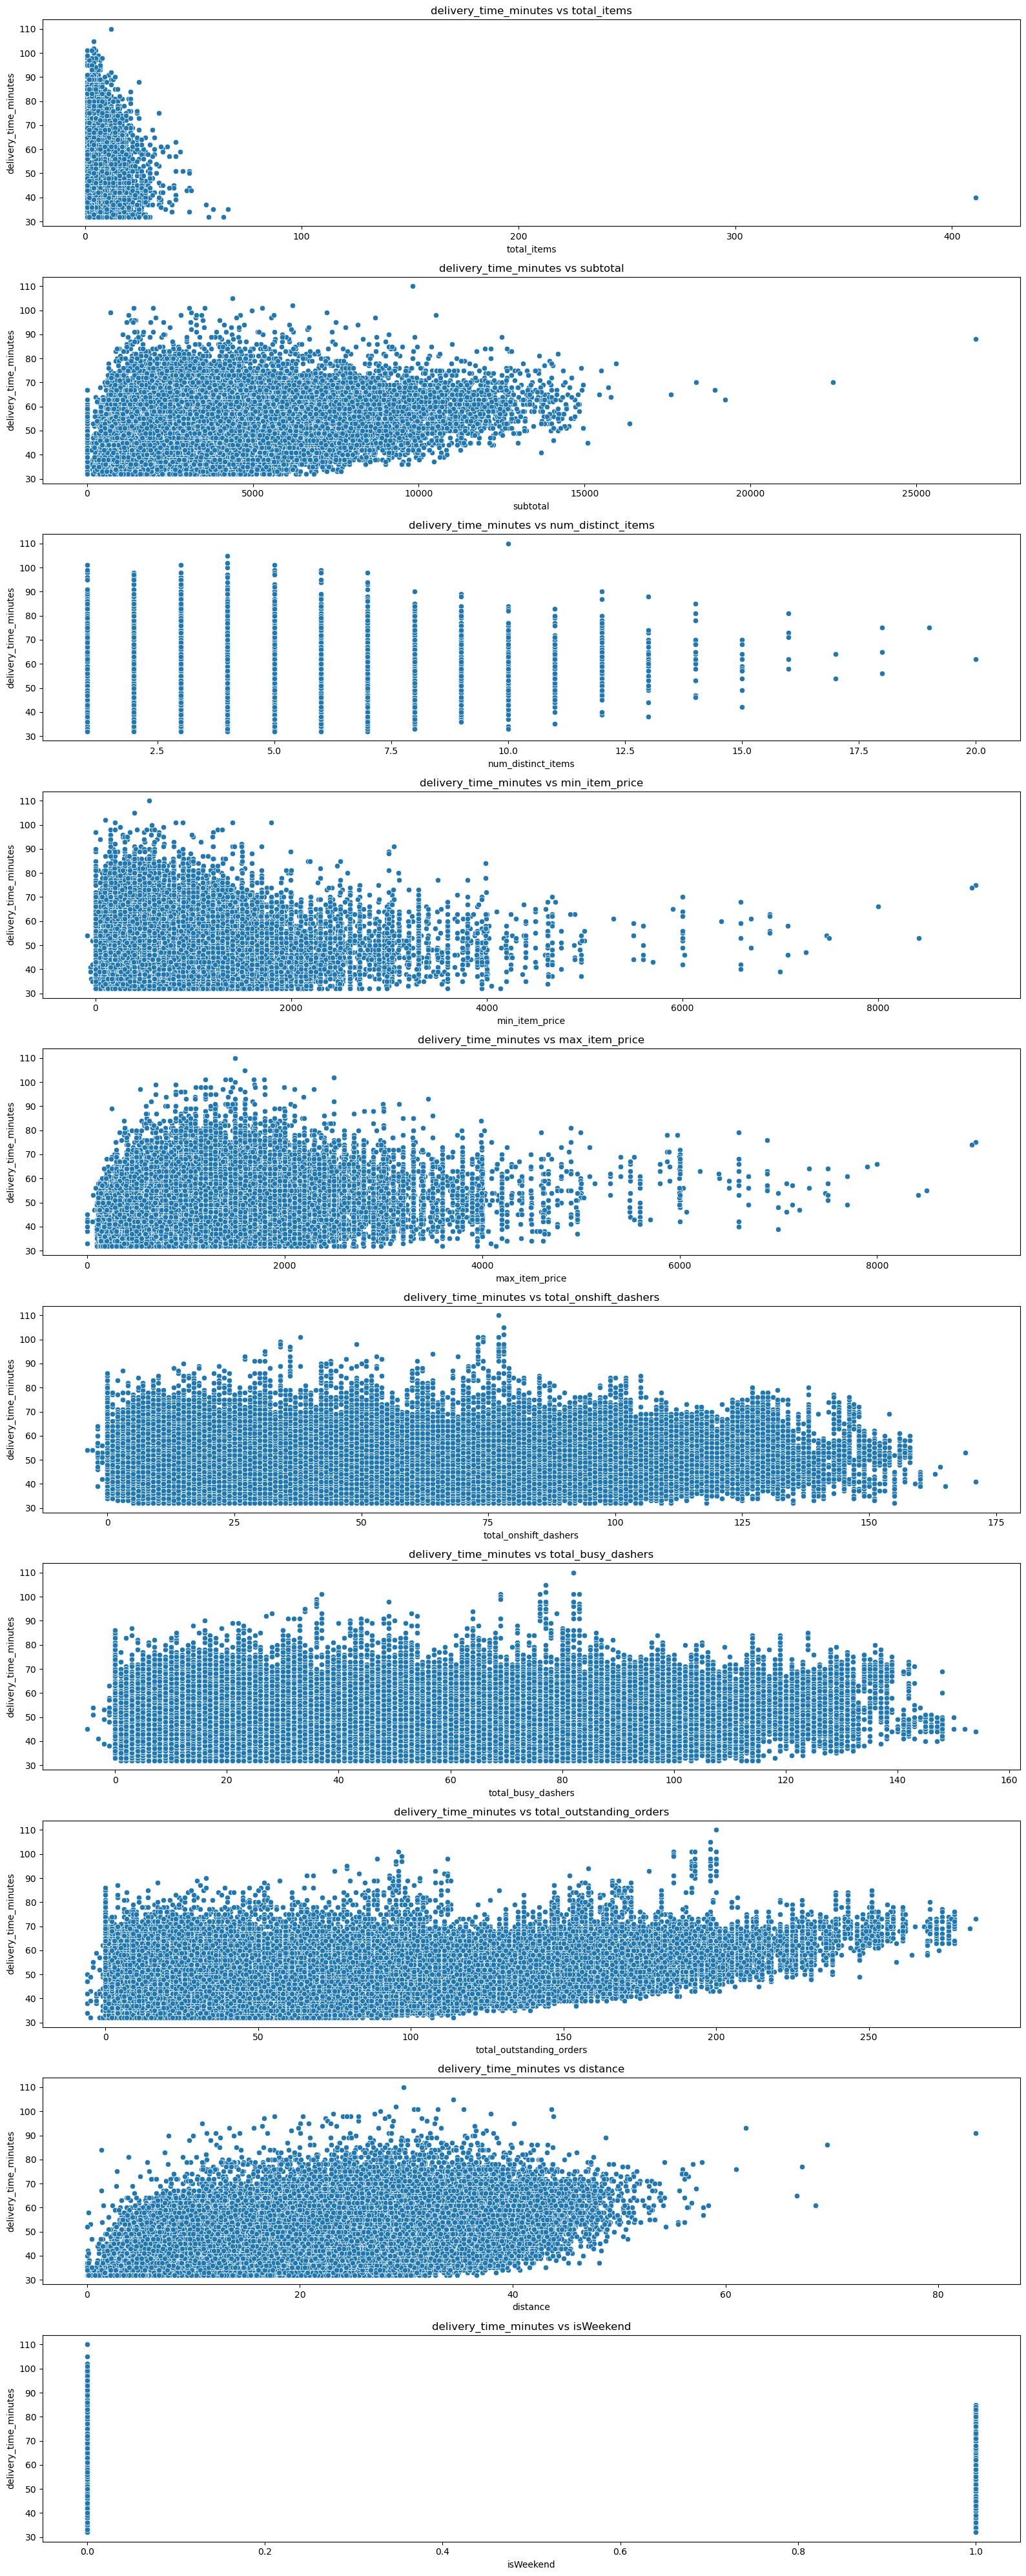

In [99]:
# Scatter plot to visualise the relationship between time_taken and other features
target = 'delivery_time_minutes'
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Plot scatter plots
plt.figure(figsize=(16, 4 * len(numeric_cols)))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.scatterplot(x=X_train[col], y=y_train)
    plt.title(f'{target} vs {col}')
    plt.xlabel(col)
    plt.ylabel(target)
    plt.tight_layout()

plt.show()


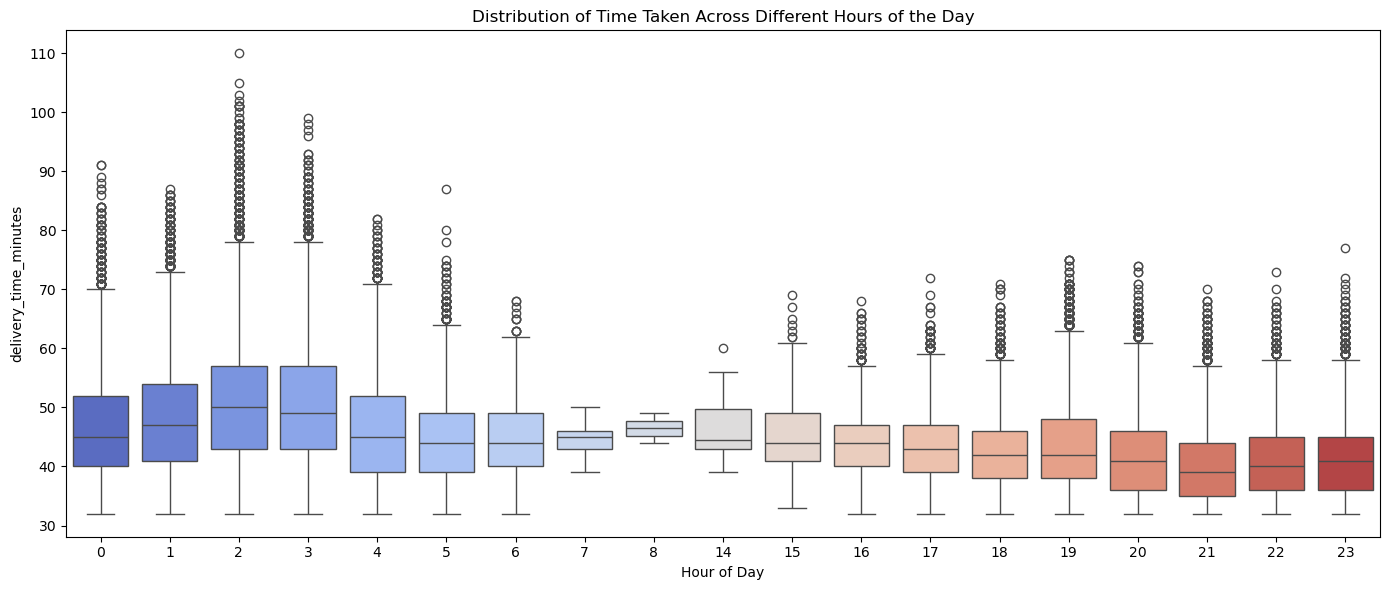

In [105]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='hour', y='delivery_time_minutes', palette='coolwarm')
plt.title('Distribution of Time Taken Across Different Hours of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('delivery_time_minutes')
plt.tight_layout()
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

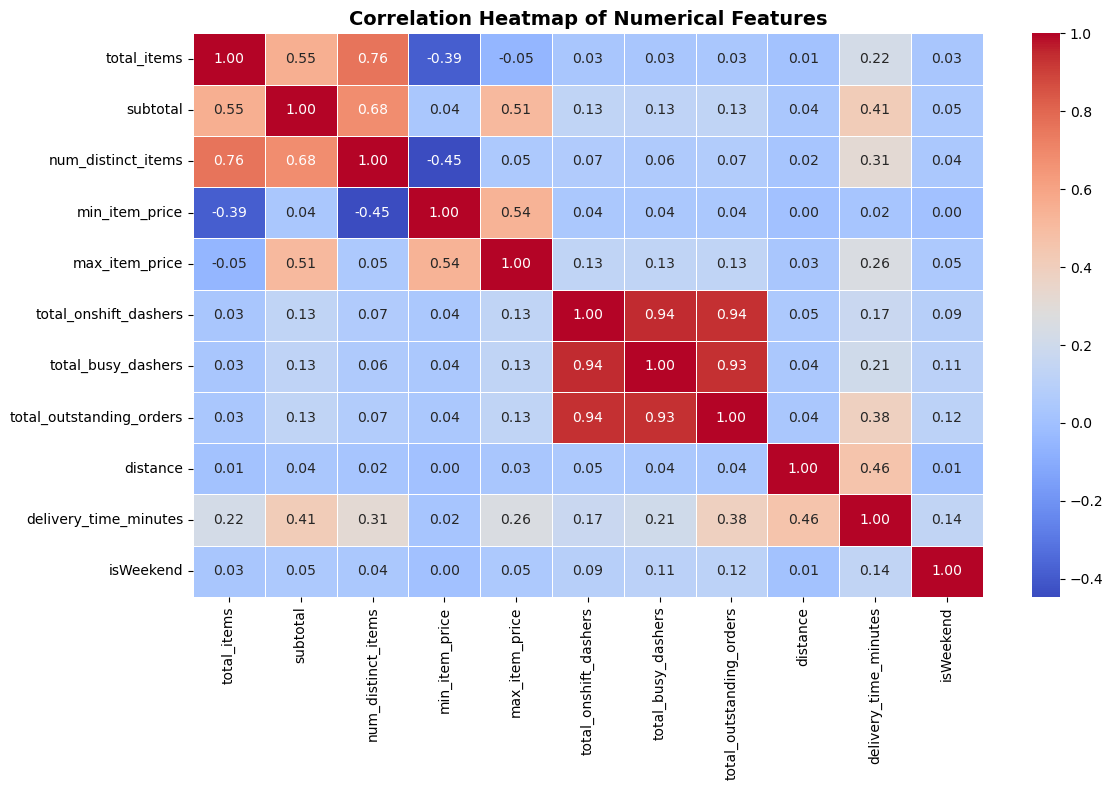

In [107]:
# Plot the heatmap of the correlation matrix
# Compute correlation matrix for numerical columns
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [111]:
# Drop 3-5 weakly correlated columns from training dataset

correlation = df.corr(numeric_only=True)['delivery_time_minutes'].drop('delivery_time_minutes')
sorted_correlations = correlation.abs().sort_values()
print("5 top correlation (weak):\n", sorted_correlations.head(5))
features_to_drop = sorted_correlations.head(5).index.tolist()
X = X.drop(columns=features_to_drop)
print("Dropped features:", features_to_drop)


5 top correlation (weak):
 min_item_price           0.022753
day_of_week              0.045878
isWeekend                0.136414
total_onshift_dashers    0.171015
total_busy_dashers       0.206045
Name: delivery_time_minutes, dtype: float64
Dropped features: ['min_item_price', 'day_of_week', 'isWeekend', 'total_onshift_dashers', 'total_busy_dashers']


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

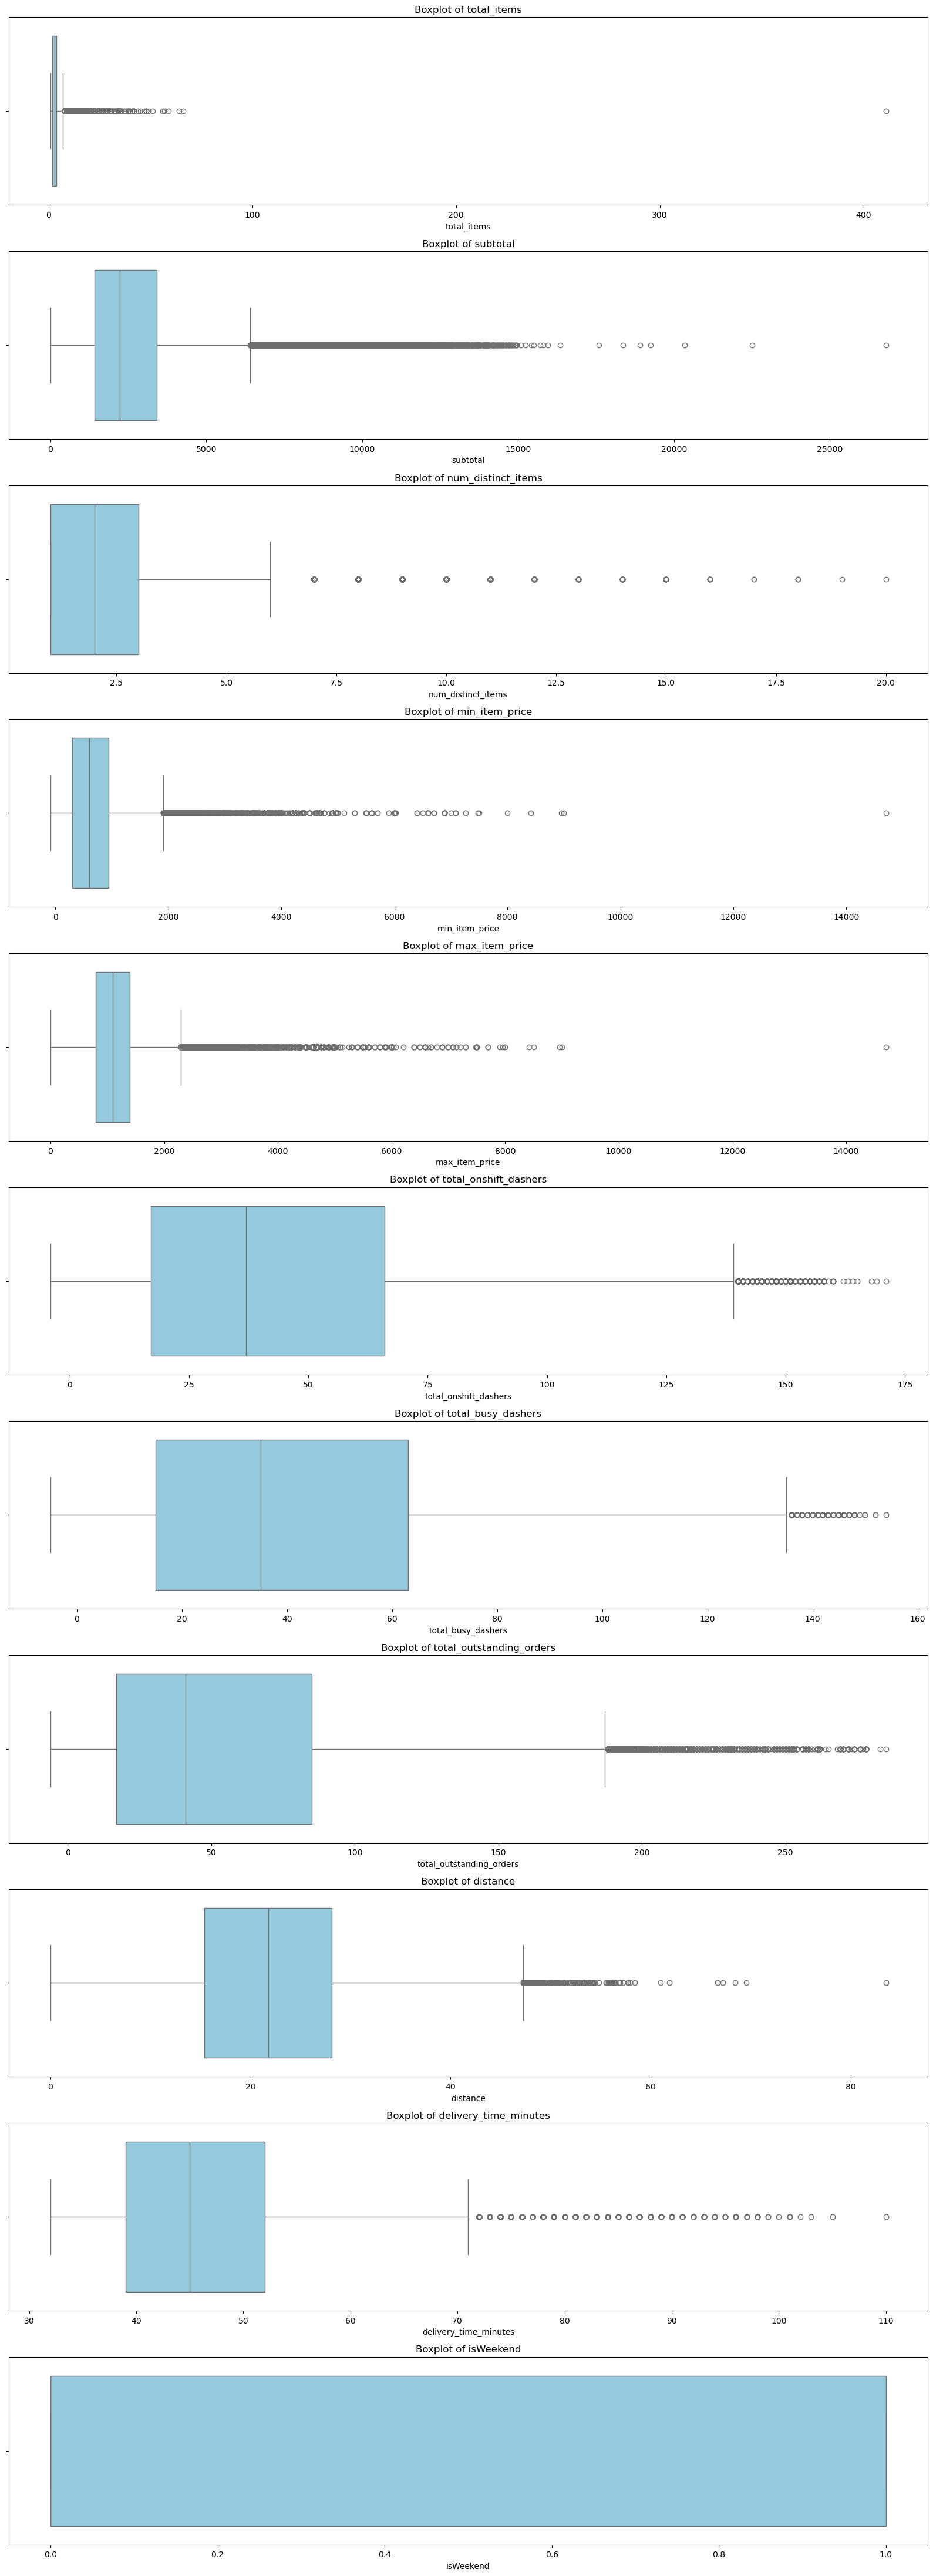

In [113]:
# Boxplot for time_taken

# Select numeric columns (including target)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Set up the figure
plt.figure(figsize=(16, 4 * len(numeric_cols)))

# Create a boxplot for each feature
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [115]:
# Handle outliers

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numeric column and cap outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

print("Outliers capped using the IQR method for all numeric columns.")


Outliers capped using the IQR method for all numeric columns.


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [117]:
# Import libraries
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')



#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [135]:

# Apply scaling to the numerical columns

from sklearn.preprocessing import StandardScaler
scaling_column = ['total_items',
 'subtotal',
 'num_distinct_items',
 'max_item_price',
 'total_busy_dashers',
 'total_outstanding_orders',
 'distance']

# Initialize the scaler
scaler = MinMaxScaler()

# fit on training data and transform both training and test sets
X_train[scaling_column] = scaler.fit_transform(X_train[scaling_column])
X_test[scaling_column] = scaler.transform(X_test[scaling_column])

# Check the first few rows of scaled training data
X_train


market_id store_primary_category order_protocol  total_items  subtotal  \
102712       2.0                     45            2.0     0.000000  0.030597   
94576        4.0                     20            3.0     0.000000  0.037127   
49784        1.0                     36            3.0     0.007317  0.076119   
37753        3.0                     39            1.0     0.002439  0.088657   
91728        2.0                      6            1.0     0.000000  0.053358   
...          ...                    ...            ...          ...       ...   
119879       2.0                     58            5.0     0.000000  0.041455   
103694       2.0                     24            1.0     0.007317  0.107463   
131932       6.0                     46            5.0     0.002439  0.067127   
146867       5.0                     36            2.0     0.021951  0.149813   
121958       1.0                     55            3.0     0.007317  0.184739   

        num_distinct_items  min_item_price  max_item_price  \
102712            0.000000             745        0.082787   
94576             0.000000             995        0.110568   
49784             0.157895             150        0.099455   
37753             0.052632             579        0.155462   
91728             0.000000            1320        0.146683   
...                    ...             ...             ...   
119879            0.000000            1111        0.123458   
103694            0.105263             495        0.088343   
131932            0.052632             300        0.099900   
146867            0.157895             195        0.094455   
121958            0.157895             549        0.155462   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
102712                   35.0            0.276730                  0.213058   
94576                   110.0            0.484277                  0.419244   
49784                     6.0            0.050314                  0.044674   
37753                    16.0            0.138365                  0.085911   
91728                    64.0            0.327044                  0.199313   
...                       ...                 ...                       ...   
119879                   31.0            0.226415                  0.137457   
103694                   95.0            0.534591                  0.402062   
131932                   18.0            0.144654                  0.072165   
146867                   26.0            0.182390                  0.116838   
121958                   47.0            0.201258                  0.113402   

        distance  hour  day_of_week  isWeekend  
102712  0.363027    21            1          0  
94576   0.373084     2            4          0  
49784   0.217433    21            4          0  
37753   0.400383     3            1          0  
91728   0.377874    21            4          0  
...          ...   ...          ...        ...  
119879  0.443487    23            6          1  
103694  0.331897     3            2          0  
131932  0.262452     1            1          0  
146867  0.282567     3            5          1  
121958  0.215996     3            0          0  

[140621 rows x 15 columns]

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [137]:
# Create/Initialise the model
model = LinearRegression()

print(model)

LinearRegression()


In [141]:
# Train the model using the training data
# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [143]:
# Make predictions
# Predict on test data
y_pred = model.predict(X_test)

print("Sample predictions:\n", y_pred[:5])

Sample predictions:
 [50.97642829 65.97171292 40.95100795 42.44948336 40.07416277]


In [145]:
# Find results for evaluation metrics

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 2.34
Root Mean Squared Error (RMSE): 3.22
R-squared (R²): 0.88


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

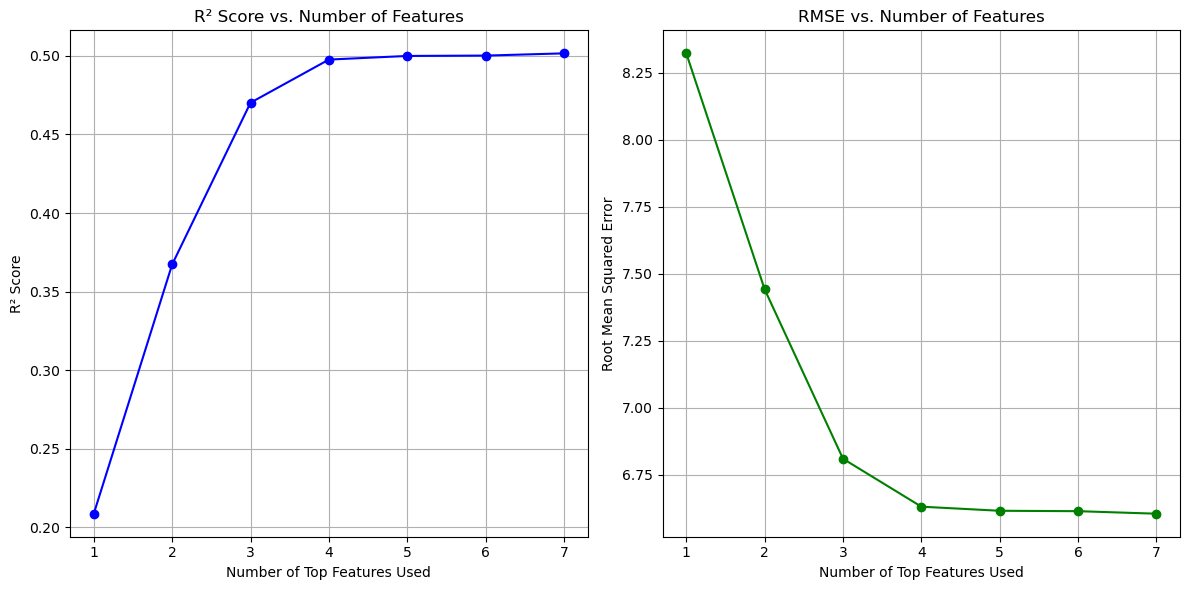

{'Best R² Score': 0.5016074499037353,
 'With Features': ['distance',
  'subtotal',
  'total_outstanding_orders',
  'hour',
  'num_distinct_items',
  'total_items',
  'max_item_price'],
 'Best RMSE': 6.604766938655925}

In [147]:
# Loop through the number of features and test the model

# Step 1: Rank features by absolute correlation with the target
correlations = df.corr(numeric_only=True)['delivery_time_minutes'].drop('delivery_time_minutes').abs()

# Step 1.1: Filter for columns that exist in X
available_features = [col for col in correlations.index if col in X.columns]

# Step 1.2: Sort features by correlation strength
sorted_features = pd.Series({col: correlations[col] for col in available_features}).sort_values(ascending=False).index.tolist()

# Step 2: Loop through increasing numbers of features and evaluate the model
r2_scores = []
rmse_scores = []

for n in range(1, len(sorted_features) + 1):
    selected_features = sorted_features[:n]
    X_subset = X[selected_features]

    # Split
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_subset, y, test_size=0.2, random_state=42)

    # Train model
    model = LinearRegression()
    model.fit(X_train_sub, y_train_sub)

    # Predict
    y_pred_sub = model.predict(X_test_sub)

    # Evaluate
    r2 = r2_score(y_test_sub, y_pred_sub)
    rmse = np.sqrt(mean_squared_error(y_test_sub, y_pred_sub))
    r2_scores.append(r2)
    rmse_scores.append(rmse)

# Step 3: Plot R² and RMSE vs. Number of Features
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(sorted_features) + 1), r2_scores, marker='o', color='blue')
plt.title('R² Score vs. Number of Features')
plt.xlabel('Number of Top Features Used')
plt.ylabel('R² Score')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(sorted_features) + 1), rmse_scores, marker='o', color='green')
plt.title('RMSE vs. Number of Features')
plt.xlabel('Number of Top Features Used')
plt.ylabel('Root Mean Squared Error')
plt.grid(True)

plt.tight_layout()
plt.show()

# Show best score summary
best_r2_index = np.argmax(r2_scores)
best_rmse_index = np.argmin(rmse_scores)
{
    "Best R² Score": r2_scores[best_r2_index],
    "With Features": sorted_features[:best_r2_index + 1],
    "Best RMSE": rmse_scores[best_rmse_index],
    "With Features": sorted_features[:best_rmse_index + 1]
}


In [149]:
# Build the final model with selected number of features


# 1. Select best feature count (based on R² or RMSE)
best_index = np.argmax(r2_scores)  # or use np.argmin(rmse_scores)
final_features = sorted_features[:best_index + 1]

# 2. Prepare final dataset
X_final = X[final_features]
y_final = y

# 3. Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# 4. Train the model
final_model = LinearRegression()
final_model.fit(X_train, y_train)

# 5. Evaluate the model
y_pred = final_model.predict(X_test)
final_r2 = r2_score(y_test, y_pred)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Final Model Performance with {len(final_features)} features:")
print(f"R² Score: {final_r2:.4f}")
print(f"RMSE: {final_rmse:.2f} minutes")
print("Selected Features:", final_features)

Final Model Performance with 7 features:
R² Score: 0.5016
RMSE: 6.60 minutes
Selected Features: ['distance', 'subtotal', 'total_outstanding_orders', 'hour', 'num_distinct_items', 'total_items', 'max_item_price']


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

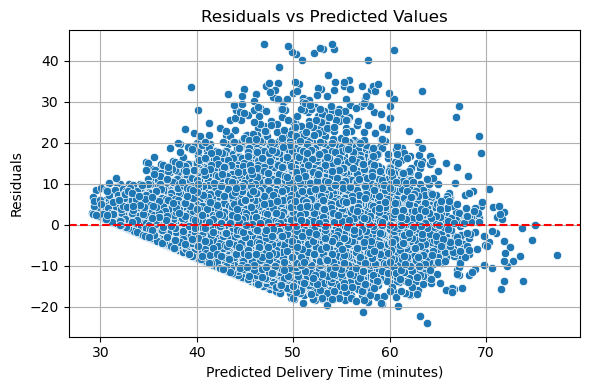

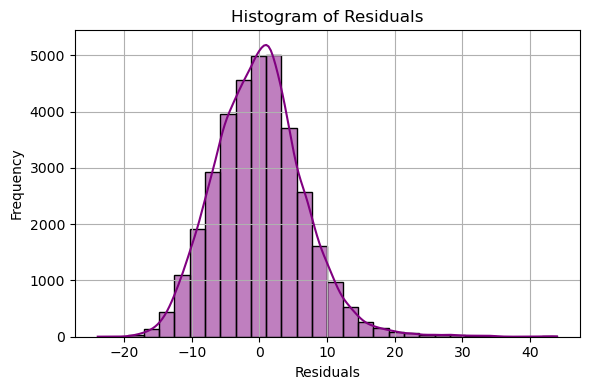

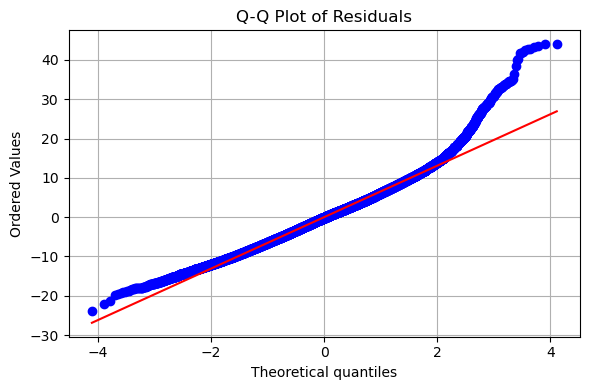

In [151]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram


# 1. Calculate residuals
residuals = y_test - y_pred

# 2. Residuals vs Predicted Values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Delivery Time (minutes)")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Histogram of Residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Q-Q Plot
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [153]:
# Compare the scaled vs unscaled features used in the final model
# Use the final selected features
X_final = X[final_features]
y_final = y

# Split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

### UN-SCALED MODEL
model_unscaled = LinearRegression()
model_unscaled.fit(X_train, y_train)
y_pred_unscaled = model_unscaled.predict(X_test)
r2_unscaled = r2_score(y_test, y_pred_unscaled)
rmse_unscaled = np.sqrt(mean_squared_error(y_test, y_pred_unscaled))

### SCALED MODEL
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)
rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred_scaled))

### Compare Results
print("Unscaled Model:")
print(f"  R² Score: {r2_unscaled:.4f}")
print(f"  RMSE: {rmse_unscaled:.2f} minutes\n")

print("Scaled Model:")
print(f"  R² Score: {r2_scaled:.4f}")
print(f"  RMSE: {rmse_scaled:.2f} minutes")

coeff_comparison = pd.DataFrame({
    'Feature': final_features,
    'Unscaled Coef': model_unscaled.coef_,
    'Scaled Coef': model_scaled.coef_
})
print(coeff_comparison)


Unscaled Model:
  R² Score: 0.5016
  RMSE: 6.60 minutes

Scaled Model:
  R² Score: 0.5016
  RMSE: 6.60 minutes
                    Feature  Unscaled Coef  Scaled Coef
0                  distance       0.460551     4.030336
1                  subtotal       0.001210     2.214576
2  total_outstanding_orders       0.046028     2.429045
3                      hour      -0.186836    -1.621229
4        num_distinct_items       0.609119     0.990438
5               total_items      -0.030933    -0.084359
6            max_item_price       0.000788     0.441246


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> Yes there are categorical variables . These are :
> market_id : geographical region code
> store_primary_category: store type example grocery
> order_protocol: type of order example ordered via website,app
>
> Effects:
> market_id can affect delivery time due to gegraphical factors like traffic
> store_primary_category can affect delivery time as certain store time like restaurant, fast food can have different prep time affecting delivery time
> Scheduled orders vs. immediate ones may have different delivery time. Scheduled orders might have shorter delivery time if properly timed and managed.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>



The parameter test_size = 0.2 is used in train_test_split() function. This means that 20% of the data goes into the test set and the remaining 80% is used as the training set



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>



distance



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> Calculate 25th percentile (Q1) and 75th percentile (Q3)
> calculate IQR = Q3 - Q1
> calculate lower_bound = Q1 - 1.5 * IQR
> calculate upper_bound = Q3 + 1.5 * IQR
> delivery_time_minute should be in between lower bound and upper bound




---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
> distance, subtotal, total_outstanding_orders



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
> Simple Linear Regression: Models the relationship between one independent variable and one dependent variable.
> $\hat{y} = \beta_0 + \beta_1 x$ where y is dependent variable, x is independent variable, B0 is intercept , B1 is slope.
> Predicting student 12th marks on 10th marks.
>
> Mulitiple Linear Regression: models the relationship between two or more independent variables and one dependent variable.
> $\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2...$ where x1,x2 are multipleindependent variable, B1 B2 are corresponding coefficients,y is dependent variable
> Predicting a student’s exam score based on hours studied, sleep hours, and class attendance.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
> The cost function measures how well the model’s predictions match the actual data.
> In linear regression, the most commonly used cost function is the Mean Squared Error (MSE).
> mse = mean_squared_error(y_actual, y_predicted)





---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>| Aspect                    | **Underfitting**                                                       | **Overfitting**                                                                   |
| ------------------------- | ---------------------------------------------------------------------- | --------------------------------------------------------------------------------- |
| **Definition**            | The model is too simple to capture the underlying pattern of the data. | The model is too complex and captures noise along with the data's actual pattern. |
| **Training Error**        | High                                                                   | Low                                                                               |
| **Validation/Test Error** | High (poor generalization)                                             | High (poor generalization)                                                        |
| **Model Behavior**        | Fails to learn from the data                                           | Learns too much (including noise)                                                 |
| **Cause**                 | Too few features, overly simplistic model                              | Too many features, model too complex                                              |
| **Example**               | Linear model for non-linear data                                       | High-degree polynomial fit for linear data                                        |




---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>A residual plot is a scatter plot of the residuals on the y-axis vs. the predicted values (or sometimes the independent variable) on the x-axis.
>Checks linearity: Residuals sattered around 0 is ideal
>Constant variance: Residuals have consistent spread across all predicted values in ideal scenarios
>Identifying outliers: Points far from the horizontal line 𝑦=0 may be outliers.
>Validates if linear regression assumptions are valid.